In [1]:
import sys
sys.path.append('..')

import pathlib
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops
from skimage.filters import sobel
from skimage.color import rgb2gray
from utils import transform_and_store, plot_transformation_comparison, plot_features
from UtilsHaralick import haralick_features


In [2]:
main_path='../dados/Hypercellularity/'

In [8]:
from skimage import io
from matplotlib import pyplot as plt

path = '../dados/Hypercellularity/07-gaussianFilter/n/113IP71229AAE.jpg'
img = io.imread(path)
img.shape

(700, 700, 3)

In [6]:
if len(img.shape) > 2:
    img = rgb2gray(img)
img.shape

(700, 700)

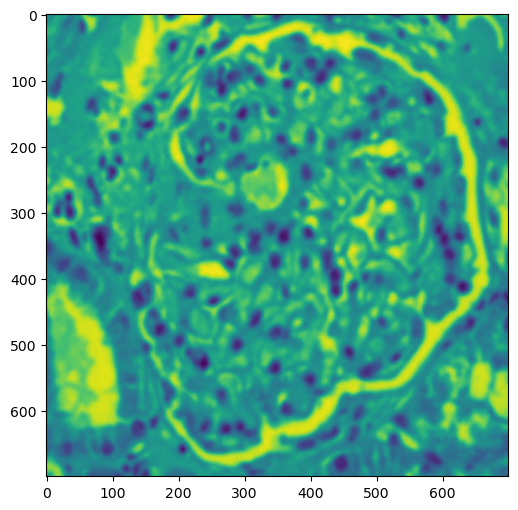

In [23]:
plt.figure(figsize=(11,6))
plt.imshow(img,)

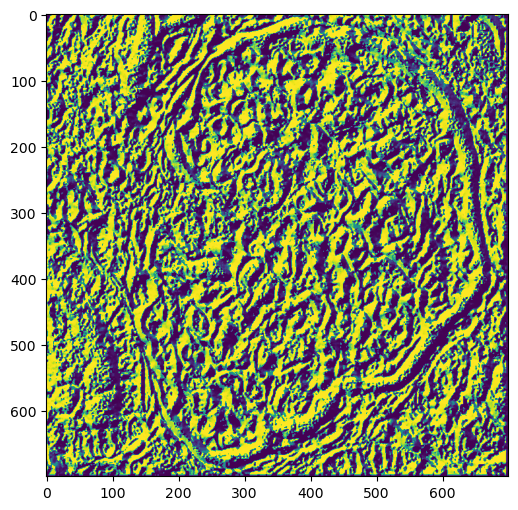

In [17]:
radius = 3
n_points = 8 * radius
METHOD = 'uniform'
r = local_binary_pattern(img, n_points, radius)
plt.figure(figsize=(11,6))
plt.imshow(r)

In [16]:
r.flatten()

(490000,)

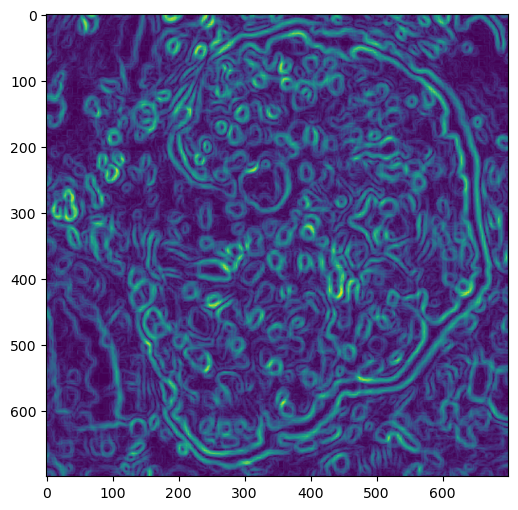

In [46]:
r = sobel(img)
plt.figure(figsize=(11,6))
plt.imshow(r)

In [10]:
def texture_extract(img):
    distance = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    properties = ['correlation', 'homogeneity', 'contrast', 'energy', 'dissimilarity']


    texture_features = []
    for i in range(0, img.shape[0], 4):
        for j in range(0, img.shape[1], 4):
            block = img[i:i+4, j:j+4]

            glcm_mat = graycomatrix(block, distances=distance, angles=angles, symmetric=True, normed=True)
            block_glcm = np.hstack([graycoprops(glcm_mat, props).ravel() for props in properties])
            texture_features.append(block_glcm)

    return np.concatenate(texture_features)

a = texture_extract(img[:,:,0])

KeyboardInterrupt: 

# Roteiro I - Local Binary Pattern

In [25]:
def apply_lbp(input_image):
    if len(input_image.shape) > 2:
        input_image = rgb2gray(input_image)
    radius = 3
    n_points = 8 * radius
    return local_binary_pattern(input_image, n_points, radius)

folders = ['03-equalizesHist','04-gammaCorrection','05-gammaCorrection02',
            '06-gammaCorrection03','07-gaussianFilter','09-laplaceFilterFromGray']

for i, folder in enumerate(folders):
    transform_and_store(
        main_path=main_path,
        data_folder_name=folder, 
        new_folder_name=f'10.{i}-LBP_from_{folder}', 
        transformation_function=apply_lbp,
        output_type='nparray'
        )

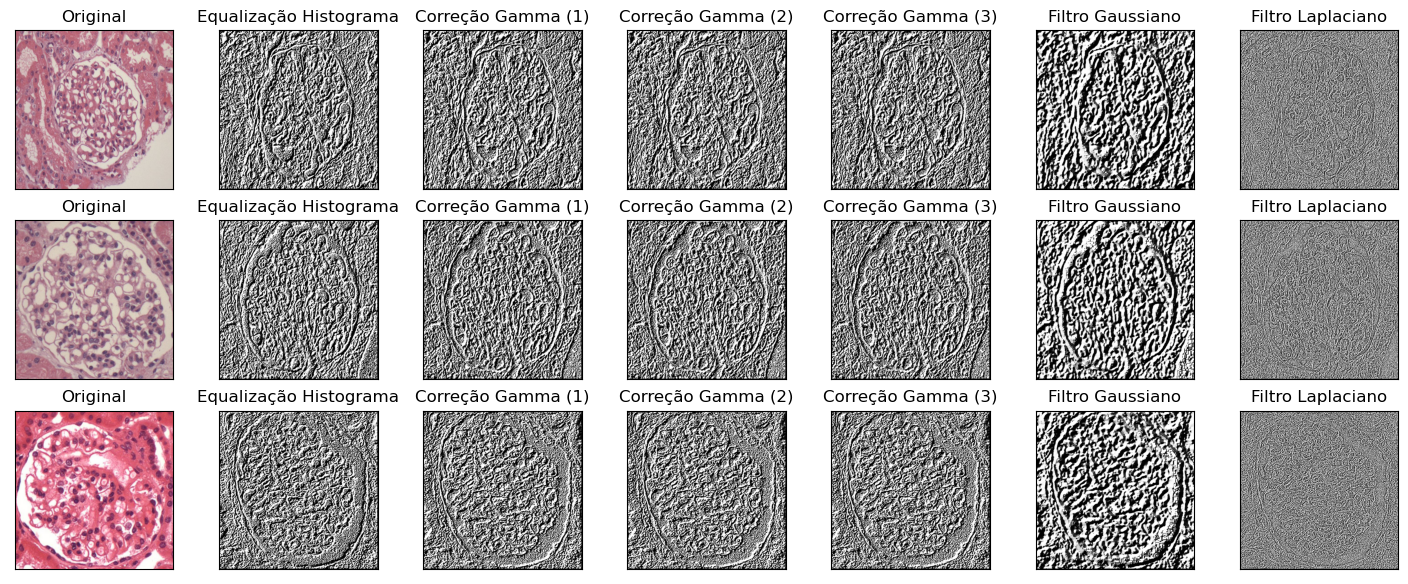

In [3]:
folders = ['01-resized','10.0-LBP_from_03-equalizesHist','10.1-LBP_from_04-gammaCorrection','10.2-LBP_from_05-gammaCorrection02',
            '10.3-LBP_from_06-gammaCorrection03','10.4-LBP_from_07-gaussianFilter','10.5-LBP_from_09-laplaceFilterFromGray']

titles = ['Original', 'Equalização Histograma', 'Correção Gamma (1)', 'Correção Gamma (2)', 'Correção Gamma (3)', 'Filtro Gaussiano',
            'Filtro Laplaciano' ]

plot_features(main_path, folders, titles)

# Roteiro II - Haralick GLCM

In [ ]:
def apply_GLCM(input_image):
    if len(input_image.shape) > 2:
        input_image = rgb2gray(input_image)
    distance = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    properties = ['correlation', 'homogeneity', 'contrast', 'energy', 'dissimilarity']


    texture_features = []
    for i in range(0, input_image.shape[0], 4):
        for j in range(0, input_image.shape[1], 4):
            block = input_image[i:i+4, j:j+4]

            glcm_mat = graycomatrix(block, distances=distance, angles=angles, symmetric=True, normed=True)
            block_glcm = np.hstack([graycoprops(glcm_mat, props).ravel() for props in properties])
            texture_features.append(block_glcm)

    return np.concatenate(texture_features)

folders = ['03-equalizesHist','04-gammaCorrection','05-gammaCorrection02',
            '06-gammaCorrection03','07-gaussianFilter','09-laplaceFilterFromGray']

for i, folder in enumerate(folders):
    transform_and_store(
        main_path=main_path,
        data_folder_name=folder, 
        new_folder_name=f'11.{i}-GLCM_from_{folder}', 
        transformation_function=apply_GLCM,
        output_type='nparray'
        )

In [ ]:
folders = ['01-resized','10.0-LBP_from_03-equalizesHist','10.1-LBP_from_04-gammaCorrection','10.2-LBP_from_05-gammaCorrection02',
            '10.3-LBP_from_06-gammaCorrection03','10.4-LBP_from_07-gaussianFilter','10.5-LBP_from_09-laplaceFilterFromGray']

titles = ['Original', 'Equalização Histograma', 'Correção Gamma (1)', 'Correção Gamma (2)', 'Correção Gamma (3)', 'Filtro Gaussiano',
            'Filtro Laplaciano' ]

plot_features(main_path, folders, titles)

# Roteiro III - Sobel

In [54]:
def apply_sobel(input_image):
    return sobel(input_image)

folders = ['03-equalizesHist','04-gammaCorrection','05-gammaCorrection02',
            '06-gammaCorrection03','07-gaussianFilter','09-laplaceFilterFromGray']

for i, folder in enumerate(folders):
    transform_and_store(
        main_path=main_path,
        data_folder_name=folder, 
        new_folder_name=f'12.{i}-sobel_from_{folder}', 
        transformation_function=apply_sobel,
        output_type='nparray'
        )

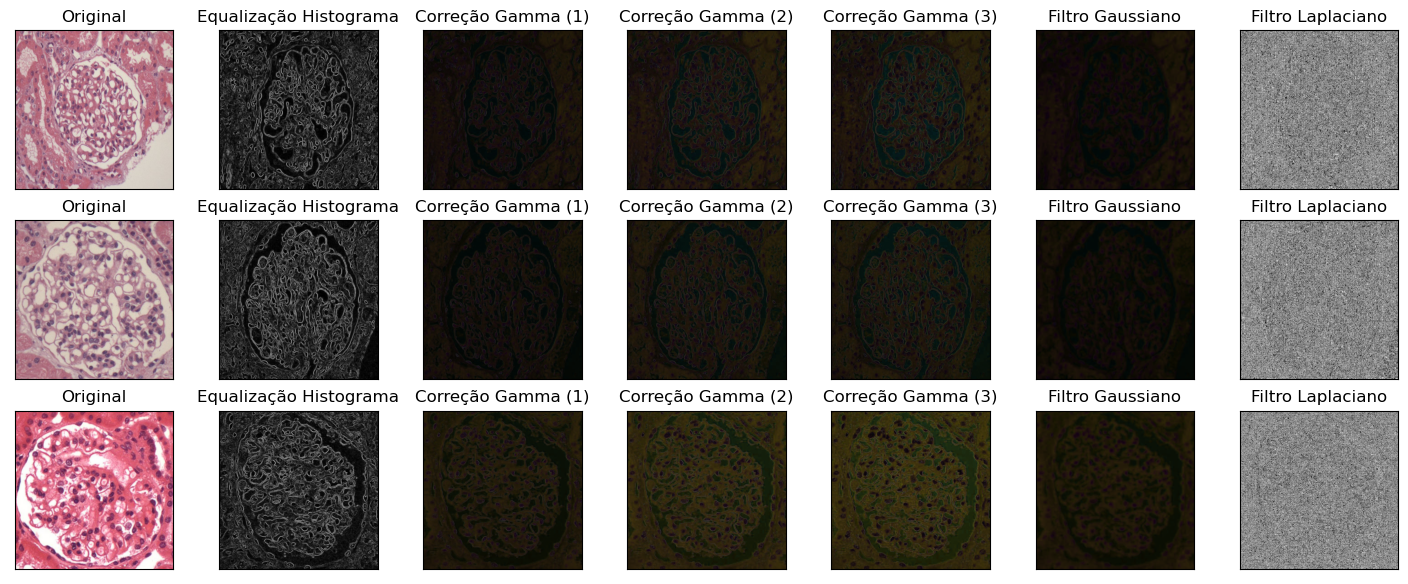

In [4]:
folders = ['01-resized','12.0-sobel_from_03-equalizesHist','12.1-sobel_from_04-gammaCorrection','12.2-sobel_from_05-gammaCorrection02',
            '12.3-sobel_from_06-gammaCorrection03','12.4-sobel_from_07-gaussianFilter','12.5-sobel_from_09-laplaceFilterFromGray']

titles = ['Original', 'Equalização Histograma', 'Correção Gamma (1)', 'Correção Gamma (2)', 'Correção Gamma (3)', 'Filtro Gaussiano',
            'Filtro Laplaciano' ]

plot_features(main_path, folders, titles)